# Observable Trends
###### 1. Out of the 10 drugs tested in the clinical trial, only 2 showed positive results. Both Capomulin and Ramicane reduced tumor volume over 45 days of treatment.
###### 2. Some metastatic spread rates were lower than than others. Overall, some drugs can help reduce metastasis.
###### 3. All drugs had positive percent change in volume except Capomulin and Ramicane. Capomulin had an average of -19.5% change in volume and Ramican had an average of -22.3%.

In [16]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Set csv paths
trial_path = 'raw_data/clinicaltrial_data.csv'
drug_path = 'raw_data/mouse_drug_data.csv'

In [18]:
# Read trial csv
trial_df = pd.read_csv(trial_path)
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [19]:
trial_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [20]:
# Check duplicate mouse
mouse_id_index = trial_df.set_index(['Mouse ID'])
mouse_check = mouse_id_index.loc['g989',:]
mouse_check

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,0,45.000000,0
g989,0,45.000000,0
g989,5,48.786801,0
g989,5,47.570392,0
g989,10,51.745156,0
g989,10,49.880528,0
g989,15,51.325852,1
g989,15,53.442020,0
g989,20,55.326122,1


In [21]:
# Will decide to assign a new id to duplicate, check indices
trial_df.index[trial_df['Mouse ID'] == 'g989'].tolist()

[107, 137, 329, 360, 620, 681, 815, 869, 950, 1111, 1195, 1380, 1592]

In [22]:
# Assign new mouse id to duplicate
trial_df.set_value([137, 360, 681, 869, 1111], 'Mouse ID', 'g989-1')

# Not sure which drug was administered to which mouse based on these values, need to check data
# 107, 329, 620, 815, 950, 1195, 1380, 1592

# Check new mouse id at indices
trial_df['Mouse ID'][[137, 360, 681, 869, 1111]]

137     g989-1
360     g989-1
681     g989-1
869     g989-1
1111    g989-1
Name: Mouse ID, dtype: object

In [23]:
# Read drug csv
drug_df = pd.read_csv(drug_path)
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [24]:
drug_df.count()

Mouse ID    250
Drug        250
dtype: int64

In [25]:
# Check duplicate mouse
drug_df[drug_df['Mouse ID'].duplicated(keep=False)]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [26]:
# Will decide to assign a new id to duplicate
drug_df.set_value(173, 'Mouse ID', 'g989-1')

# Check changed mouse
drug_df['Mouse ID'][173]

'g989-1'

In [27]:
# Merge trail and drug dataframes
pyma_df = pd.merge(trial_df, drug_df, how='left')
pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [28]:
# Check count
pyma_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug                  1893
dtype: int64

In [29]:
# Check duplicate mouse
mouse_id_index = pyma_df.set_index(['Mouse ID'])
mouse_check = mouse_id_index.loc['g989-1',:]
mouse_check

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
Mouse ID,,,,
g989-1,0,45.000000,0,Propriva
g989-1,5,47.570392,0,Propriva
g989-1,10,49.880528,0,Propriva
g989-1,15,53.442020,0,Propriva
g989-1,20,54.657650,1,Propriva


# Tumor Response to Treatment

In [30]:
# Group by drug and timepoint
group_drug_time = pyma_df.groupby(['Drug', 'Timepoint'])

# Grab mean tumor volume
mean_tumor = group_drug_time['Tumor Volume (mm3)'].mean()

# Create dataframe from groupby object
tumor_resp_treat = pd.DataFrame({'Tumor Volume (mm3)': mean_tumor})
tumor_resp_treat.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [31]:
# Group by drug and timepoint
group_time_drug = pyma_df.groupby(['Timepoint', 'Drug'])

# Grab mean tumor volumes
mean_tumor = group_time_drug['Tumor Volume (mm3)'].mean()

# unstack by timepoint
unstack_tumor = mean_tumor.unstack()
unstack_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.184891,43.944859,47.525662,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.981377,42.531957,49.444904,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.051160,41.495061,51.442472,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.223026,40.238325,54.037882,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [32]:
# Grab sem tumor volume
sem_tumor = group_time_drug['Tumor Volume (mm3)'].sem()

# unstack by timepoint
unstack_sem_tumor = sem_tumor.unstack()

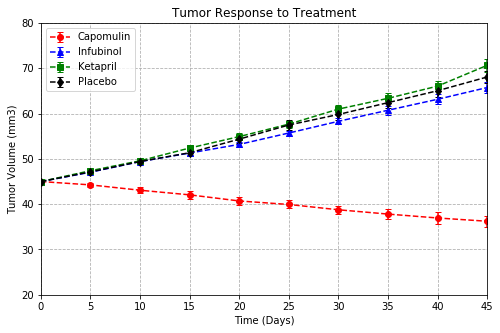

In [33]:
# Create x and y axes
time = np.arange(0, 50, 5)
capomulin = unstack_tumor['Capomulin']
infubinol = unstack_tumor['Infubinol']
ketapril = unstack_tumor['Ketapril']
placebo = unstack_tumor['Placebo']

# Set figure size
plt.figure(figsize=(8, 5))

# Plot the charts and apply some styling
# cap_tum, = plt.plot(time, capomulin, color="red", marker='o', linestyle='--', label="Capomulin")
# inf_tum, = plt.plot(time, infubinol, color="blue", marker='^', linestyle='--', label="Infubinol")
# ket_tum, = plt.plot(time, ketapril, color="green", marker='s', linestyle='--', label="Ketapril")
# pla_tum, = plt.plot(time, placebo, color="black", marker='d', linestyle='--', label="Placebo")

# Create x and y axes for error bars
sem_capomulin = unstack_sem_tumor['Capomulin']
sem_infubinol = unstack_sem_tumor['Infubinol']
sem_ketapril = unstack_sem_tumor['Ketapril']
sem_placebo = unstack_sem_tumor['Placebo']

# Plot standard error bars
cap_tum = plt.errorbar(time, capomulin, yerr=sem_capomulin, fmt="o", color="red",
                       capsize=3, linestyle='--', alpha=1, label="Capomulin")
inf_tum = plt.errorbar(time, infubinol, yerr=sem_infubinol, fmt="^", color="blue", 
                       capsize=3, linestyle='--', alpha=1, label="Infubinol")
ket_tum = plt.errorbar(time, ketapril, yerr=sem_ketapril, fmt="s", color="green", 
                       capsize=3, linestyle='--', alpha=1, label="Ketapril")
pla_tum = plt.errorbar(time, placebo, yerr=sem_placebo, fmt="d", color="black", 
                       capsize=3, linestyle='--', alpha=1, label="Placebo")

# Set the limits for the X and Y axes
plt.xlim(0,45)
plt.ylim(20,80)

# Add in a grid for the chart
ax = plt.gca()
ax.grid(linestyle='--')

# Add title, x and y axes labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Create legend
plt.legend(handles=[cap_tum, inf_tum, ket_tum, pla_tum], loc="best")

# Tumor Response to Treatment
plt.savefig('images/tumorVolume.png')
plt.show()

# Metastatic Response to Treatment

In [34]:
# Group by drug and timepoint
group_drug_time = pyma_df.groupby(['Drug', 'Timepoint'])

# Grab mean metastatic sites
mean_meta = group_drug_time['Metastatic Sites'].mean()

# Create dataframe from groupby object
meta_resp_treat = pd.DataFrame({'Metastatic Sites': mean_meta})
meta_resp_treat.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [35]:
# Group by drug and timepoint
group_time_drug = pyma_df.groupby(['Timepoint', 'Drug'])

# Grab mean metastatic sites
mean_meta = group_time_drug['Metastatic Sites'].mean()

# unstack by timepoint
unstack_meta = mean_meta.unstack()
unstack_meta

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.333333,0.120000,0.250000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.590909,0.250000,0.500000,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.750000,0.333333,0.818182,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.950000,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [36]:
# Grab sem tumor volume
sem_meta = group_time_drug['Metastatic Sites'].sem()

# unstack by timepoint
unstack_sem_meta = sem_meta.unstack()

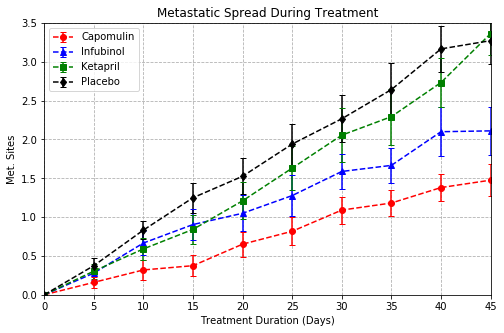

In [37]:
# Create x and y axes
time = np.arange(0, 50, 5)
capomulin = unstack_meta['Capomulin']
infubinol = unstack_meta['Infubinol']
ketapril = unstack_meta['Ketapril']
placebo = unstack_meta['Placebo']

# Set figure size
plt.figure(figsize=(8, 5))

# Plot the charts and apply some styling
# cap_met, = plt.plot(time, capomulin, color="red", marker='o', linestyle='--', label="Capomulin")
# inf_met, = plt.plot(time, infubinol, color="blue", marker='^', linestyle='--', label="Infubinol")
# ket_met, = plt.plot(time, ketapril, color="green", marker='s', linestyle='--', label="Ketapril")
# pla_met, = plt.plot(time, placebo, color="black", marker='d', linestyle='--', label="Placebo")

# Create x and y axes for error bars
sem_capomulin = unstack_sem_meta['Capomulin']
sem_infubinol = unstack_sem_meta['Infubinol']
sem_ketapril = unstack_sem_meta['Ketapril']
sem_placebo = unstack_sem_meta['Placebo']

# Plot standard error bars
cap_met = plt.errorbar(time, capomulin, yerr=sem_capomulin, fmt="o", color="red",
                       capsize=3, linestyle='--', alpha=1, label="Capomulin")
inf_met = plt.errorbar(time, infubinol, yerr=sem_infubinol, fmt="^", color="blue", 
                       capsize=3, linestyle='--', alpha=1, label="Infubinol")
ket_met = plt.errorbar(time, ketapril, yerr=sem_ketapril, fmt="s", color="green", 
                       capsize=3, linestyle='--', alpha=1, label="Ketapril")
pla_met = plt.errorbar(time, placebo, yerr=sem_placebo, fmt="d", color="black", 
                       capsize=3, linestyle='--', alpha=1, label="Placebo")

# Set the limits for the X and Y axes
plt.xlim(0,45)
plt.ylim(0,3.5)

# Add in a grid for the chart
ax = plt.gca()
ax.grid(linestyle='--')

# Add title, x and y axes labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Create legend
plt.legend(handles=[cap_met, inf_met, ket_met, pla_met], loc="best")

# Metatstatic Spread During Treatment
plt.savefig('images/metaSites.png')
plt.show()

# Survival Rates

In [38]:
# Group by drug and timepoint
group_drug_time = pyma_df.groupby(['Drug', 'Timepoint'])

# Grab mean mouse count
mouse_count = group_drug_time['Mouse ID'].count()

# Create dataframe from groupby object
surv_rate = pd.DataFrame({'Mouse Count': mouse_count})
surv_rate.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [39]:
# Group by drug and timepoint
group_time_drug = pyma_df.groupby(['Timepoint', 'Drug'])

# Grab mean mouse count
mouse_count = group_time_drug['Mouse ID'].count()

# unstack by timepoint
unstack_surv = mouse_count.unstack()
unstack_surv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,13,23,19,16
30,22,16,17,18,15,15,12,23,18,15
35,22,14,12,17,15,14,9,21,16,14
40,21,14,10,15,15,12,9,20,12,14


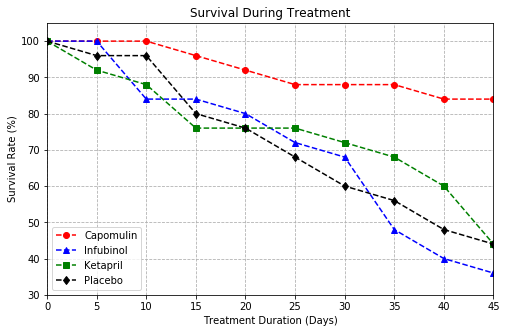

In [40]:
# Create x and y axes
time = np.arange(0, 50, 5)
capomulin = unstack_surv['Capomulin']/25*100
infubinol = unstack_surv['Infubinol']/25*100
ketapril = unstack_surv['Ketapril']/25*100
placebo = unstack_surv['Placebo']/25*100

# Set figure size
plt.figure(figsize=(8, 5))

# Plot the charts and apply some styling
cap_surv, = plt.plot(time, capomulin, color="red", marker='o', linestyle='--', label="Capomulin")
inf_surv, = plt.plot(time, infubinol, color="blue", marker='^', linestyle='--', label="Infubinol")
ket_surv, = plt.plot(time, ketapril, color="green", marker='s', linestyle='--', label="Ketapril")
pla_surv, = plt.plot(time, placebo, color="black", marker='d', linestyle='--', label="Placebo")

# Set the limits for the X and Y axes
plt.xlim(0,45)
plt.ylim(30,105)

# Add gridlines
ax = plt.gca()
ax.grid(linestyle='--')

# Add title, x and y axes labels
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")

# Create legend
plt.legend(handles=[cap_surv, inf_surv, ket_surv, pla_surv], loc="lower left")

# Survial During Treatment
plt.savefig('images/survRate.png')
plt.show()

# Summary Bar Graph

In [41]:
# Check unstack tumor dataframe
unstack_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.184891,43.944859,47.525662,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.981377,42.531957,49.444904,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.051160,41.495061,51.442472,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.223026,40.238325,54.037882,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [42]:
# Grab final tumor size
final_tumor_size = unstack_tumor.iloc[9,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
final_tumor_size

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [43]:
# Create dataframe
tum_vol_chg = pd.DataFrame(final_tumor_size)

# Rename column
tum_vol_chg = tum_vol_chg.rename(columns={45: 'Final Tumor Size'})

# Calculate percent change and add to dataframe
tum_vol_chg['% Tumor Volume Change'] = (tum_vol_chg['Final Tumor Size'] - 45)/45*100

# Drop final tumor size column
tum_vol_chg = tum_vol_chg.drop('Final Tumor Size', axis=1)

# Add if positive column for bar chart coloring
tum_vol_chg['Positive?'] = tum_vol_chg['% Tumor Volume Change'] > 0
tum_vol_chg

,% Tumor Volume Change,Positive?
Drug,,
Capomulin,-19.475303,False
Ceftamin,42.516492,True
Infubinol,46.123472,True
Ketapril,57.028795,True
Naftisol,53.923347,True
Placebo,51.297960,True
Propriva,47.241175,True
Ramicane,-22.320900,False
Stelasyn,52.085134,True


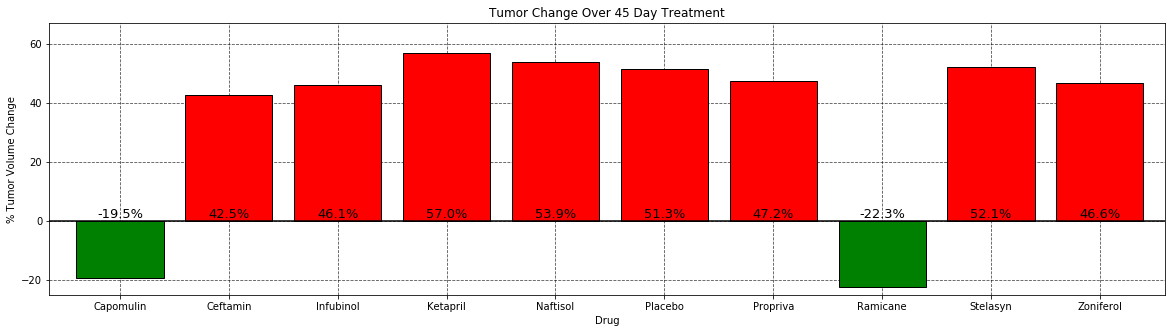

In [44]:
# Create list of % tumor volume change of several drugs
drugs = [tum_vol_chg['% Tumor Volume Change'][0], tum_vol_chg['% Tumor Volume Change'][1], 
         tum_vol_chg['% Tumor Volume Change'][2], tum_vol_chg['% Tumor Volume Change'][3], 
         tum_vol_chg['% Tumor Volume Change'][4], tum_vol_chg['% Tumor Volume Change'][5], 
         tum_vol_chg['% Tumor Volume Change'][6], tum_vol_chg['% Tumor Volume Change'][7], 
         tum_vol_chg['% Tumor Volume Change'][8], tum_vol_chg['% Tumor Volume Change'][9]]
x_axis = np.arange(len(drugs))

# Set figure size
plt.figure(figsize=(20, 5))

# Plot bars
tum_bar = plt.bar(x_axis, drugs, color=tum_vol_chg['Positive?'].map({True: 'r', False: 'g'}), 
                  edgecolor='black', alpha=1, align="edge")

# Place tick locations and label
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Set the x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(-25, max(drugs)+10)

# Draw horizontal line
plt.axhline(y=0, xmin=0, xmax=1, linestyle='-', color='black')

# Give our chart some labels and a tile
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")

# Insert grid lines and set behind plot elements
ax = plt.gca()
ax.grid(linestyle='--')
ax.grid(color='black', alpha=0.7)
ax.set_axisbelow(True)

# Annotate bars
perc_tum_vol_chg = [f'{chg:.1f}%' for chg in drugs]
for i, rect in enumerate(tum_bar):
    height = 0
    plt.text(rect.get_x() + rect.get_width()/2.0, height, perc_tum_vol_chg[i], 
             color='black', fontsize='13', ha='center', va='bottom')

# Tumor Change Over 45 Day Treatment
plt.savefig('images/percTumorChange.png')
plt.show()